IMPORTING THE LIBRARIES

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=pd.read_csv('/content/Data Analyst - Test Data - US.csv')

In [18]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [20]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [21]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

Analysis on positive and negative reviews

In [34]:
import pandas as pd
from textblob import TextBlob

# Drop null values in the 'Review' column
df_cleaned_reviews = df.dropna(subset=['Review'])

# Define a function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative' if analysis.sentiment.polarity < 0 else 'neutral'

# Apply sentiment analysis to the 'Review' column
df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(get_sentiment_polarity)

# Count the number of positive and negative reviews
positive_reviews_count = (df_cleaned_reviews['Sentiment'] == 'positive').sum()
negative_reviews_count = (df_cleaned_reviews['Sentiment'] == 'negative').sum()

# Display the results
print("Number of Positive Reviews:", positive_reviews_count)
print("Number of Negative Reviews:", negative_reviews_count)


Number of Positive Reviews: 5069
Number of Negative Reviews: 650


<ipython-input-34-f1d4df20a20a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(get_sentiment_polarity)


Visualization of the positive and negative reviews

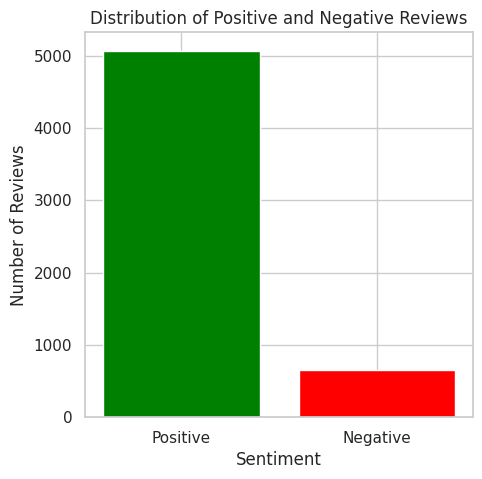

In [54]:
# Visualize the distribution of positive and negative reviews using a simple bar plot
plt.figure(figsize=(5, 5))
plt.bar(['Positive', 'Negative'], [positive_reviews_count, negative_reviews_count], color=['green', 'red'])
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()



Wordcloud

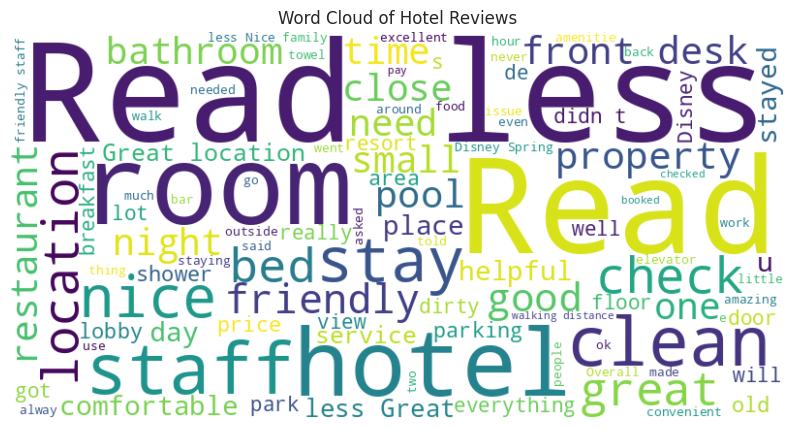

In [56]:
from wordcloud import WordCloud
from collections import Counter

# Combine all reviews into a single text
all_reviews_text = ' '.join(df_cleaned_reviews['Review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hotel Reviews')
plt.show()

Top frequent words used after removing the stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


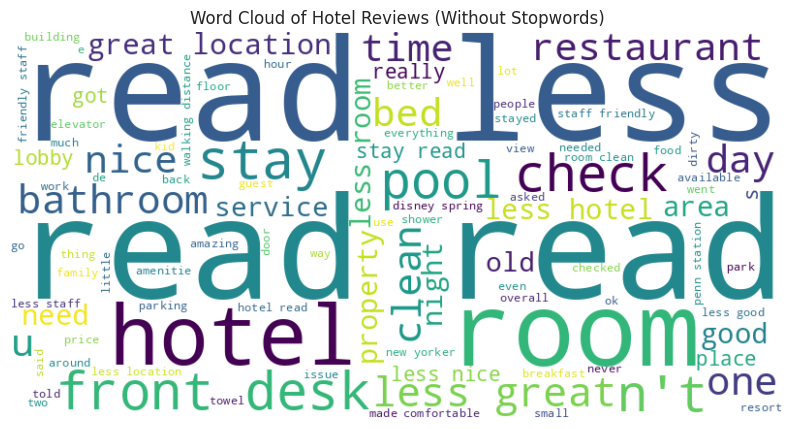

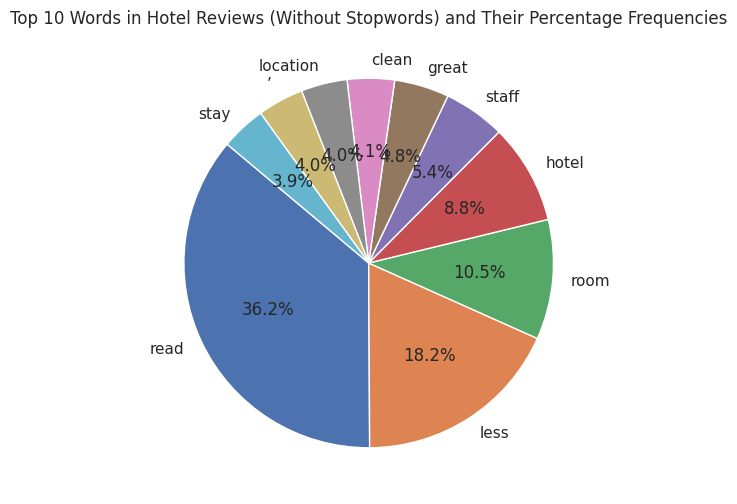

In [81]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single text
all_reviews_text = ' '.join(df_cleaned_reviews['Review'])

# Remove stopwords
filtered_words = [word.lower() for word in TextBlob(all_reviews_text).words if word.lower() not in stop_words]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(filtered_words))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hotel Reviews (Without Stopwords)')
plt.show()

# Count word frequencies after removing stopwords
word_frequencies = Counter(filtered_words)

# Calculate the percentage frequency for each word
total_words = sum(word_frequencies.values())
word_percentages = {word: (freq / total_words) * 100 for word, freq in word_frequencies.items()}

# Sort words by frequency in descending order
sorted_word_percentages = dict(sorted(word_percentages.items(), key=lambda item: item[1], reverse=True))

# Display the top 10 words and their percentage frequencies
top_words = list(sorted_word_percentages.keys())[:10]
top_percentages = list(sorted_word_percentages.values())[:10]

# Pie plot of the top words and their percentage frequencies
plt.figure(figsize=(6, 6))
plt.pie(top_percentages, labels=top_words, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Words in Hotel Reviews (Without Stopwords) and Their Percentage Frequencies')
plt.show()

Analyze review length (number of words)

<ipython-input-69-9c542da267ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Review_Length'] = df_cleaned_reviews['Review'].apply(lambda x: len(TextBlob(x).words))


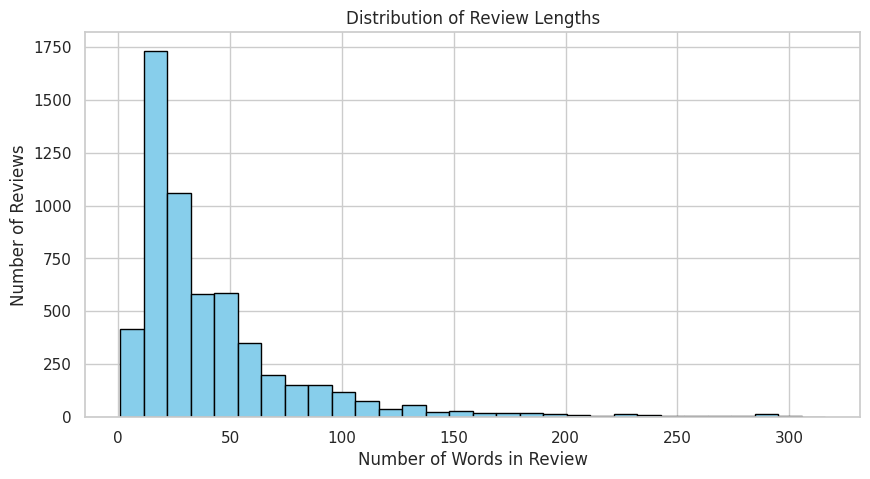

In [69]:
# Analyze review length (number of words)
df_cleaned_reviews['Review_Length'] = df_cleaned_reviews['Review'].apply(lambda x: len(TextBlob(x).words))

# Plot the distribution of review lengths
plt.figure(figsize=(10, 5))
plt.hist(df_cleaned_reviews['Review_Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Number of Reviews')
plt.show()


Distribution of the review related to positive and negative

<ipython-input-74-718d9f7ac241>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
<ipython-input-74-718d9f7ac241>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Tokenized_Review'] = df_cleaned_reviews['Review'].apply(clean_and_tokenize)
<ipython-input-74-718d9f7ac241>:18: SettingWithCopyWarn

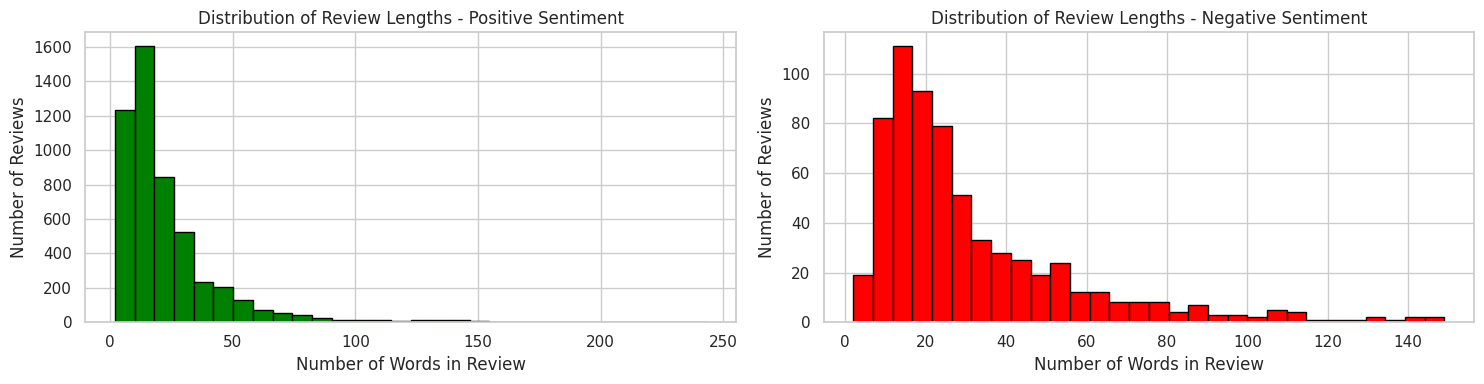

In [74]:
import re
# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    tokens = [word for word in TextBlob(text).words if word.lower() not in stop_words]
    return tokens

# Analyze sentiment for each review
df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')

# Clean and tokenize the reviews, ignoring stopwords
df_cleaned_reviews['Tokenized_Review'] = df_cleaned_reviews['Review'].apply(clean_and_tokenize)

# Separate reviews into positive and negative categories
positive_reviews = df_cleaned_reviews[df_cleaned_reviews['Sentiment'] == 'positive']
negative_reviews = df_cleaned_reviews[df_cleaned_reviews['Sentiment'] == 'negative']

# Analyze the length of reviews in positive and negative aspects
positive_reviews['Review_Length'] = positive_reviews['Tokenized_Review'].apply(len)
negative_reviews['Review_Length'] = negative_reviews['Tokenized_Review'].apply(len)

# Plot the distribution of review lengths for positive and negative reviews
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.hist(positive_reviews['Review_Length'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Review Lengths - Positive Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Number of Reviews')

plt.subplot(1, 2, 2)
plt.hist(negative_reviews['Review_Length'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Review Lengths - Negative Sentiment')
plt.xlabel('Number of Words in Review')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

Top 20 location with most review

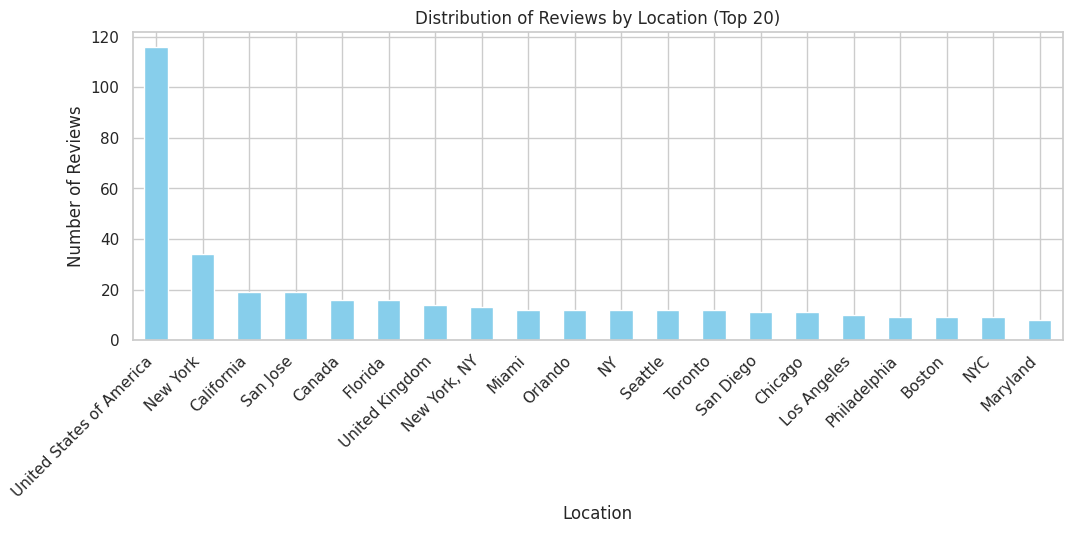

In [76]:
# Drop null values in the 'Location' column
df_cleaned_locations = df.dropna(subset=['Location'])

# Count the number of reviews per location
reviews_per_location = df_cleaned_locations['Location'].value_counts()

# Plot the distribution of reviews per location
plt.figure(figsize=(12, 4))
reviews_per_location.head(20).plot(kind='bar', color='skyblue')
plt.title('Distribution of Reviews by Location (Top 20)')
plt.xlabel('Location')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


Top 5 countries with number of poitive and negative reviews

<ipython-input-79-156c5c714440>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')
<ipython-input-79-156c5c714440>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Tokenized_Review'] = df_cleaned_reviews['Review'].apply(clean_and_tokenize)


<Figure size 1200x400 with 0 Axes>

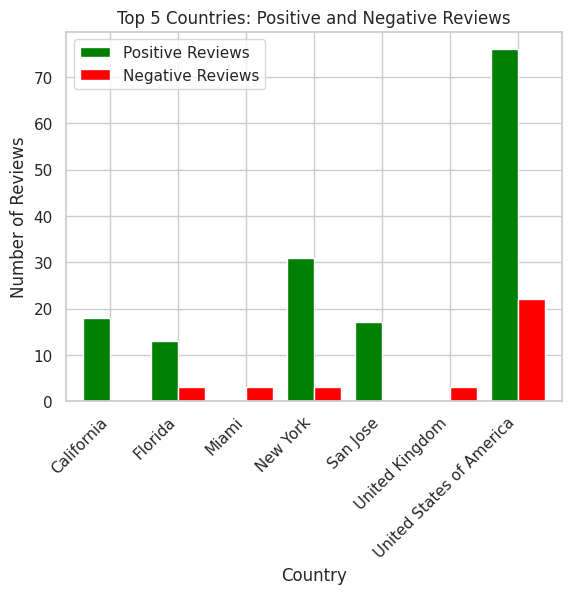

In [79]:
# Drop null values in the 'Review' and 'Location' columns
df_cleaned_reviews = df.dropna(subset=['Review', 'Location'])

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    tokens = [word for word in TextBlob(text).words if word.lower() not in stop_words]
    return tokens

# Analyze sentiment for each review
df_cleaned_reviews['Sentiment'] = df_cleaned_reviews['Review'].apply(lambda x: 'positive' if TextBlob(x).sentiment.polarity > 0 else 'negative' if TextBlob(x).sentiment.polarity < 0 else 'neutral')

# Clean and tokenize the reviews, ignoring stopwords
df_cleaned_reviews['Tokenized_Review'] = df_cleaned_reviews['Review'].apply(clean_and_tokenize)

# Separate reviews into positive and negative categories
positive_reviews = df_cleaned_reviews[df_cleaned_reviews['Sentiment'] == 'positive']
negative_reviews = df_cleaned_reviews[df_cleaned_reviews['Sentiment'] == 'negative']

# Count the number of positive and negative reviews per location
top_countries_positive = positive_reviews['Location'].value_counts().head(5)
top_countries_negative = negative_reviews['Location'].value_counts().head(5)

# Merge the counts into a single DataFrame
reviews_per_location_df = pd.DataFrame({
    'Positive Reviews': top_countries_positive,
    'Negative Reviews': top_countries_negative
}).fillna(0)

# Plot the distribution of positive and negative reviews per location
plt.figure(figsize=(12, 4))
reviews_per_location_df.plot(kind='bar', width=0.8, color=['green', 'red'])
plt.title('Top 5 Countries: Positive and Negative Reviews')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

Distribution of the review over time

<ipython-input-83-6b49ad185acc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
<ipython-input-83-6b49ad185acc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_reviews['Month_Year'] = df_cleaned_reviews['date'].dt.to_period('M')


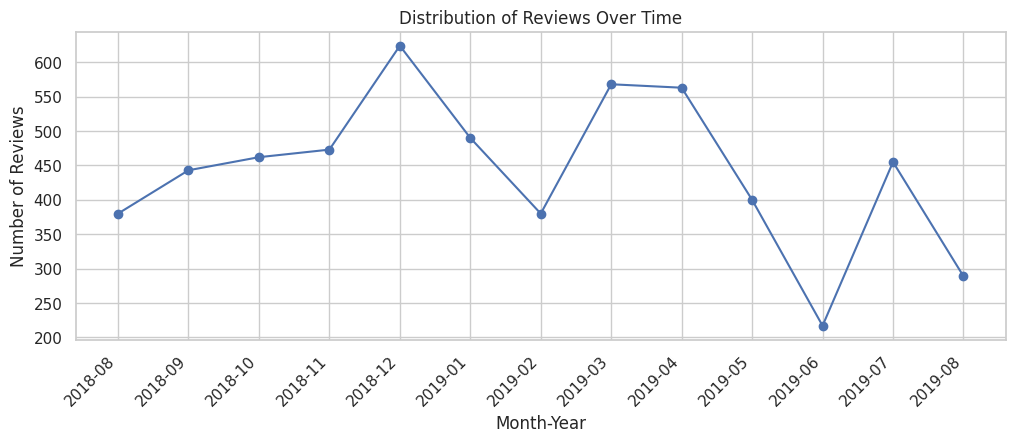

In [83]:

# Convert 'date' to datetime format if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop null values in the 'Review' and 'date' columns
df_cleaned_reviews = df.dropna(subset=['Review', 'date'])

# Extract month and year from the 'date' column
df_cleaned_reviews['Month_Year'] = df_cleaned_reviews['date'].dt.to_period('M')

# Count the number of reviews per month
reviews_per_month = df_cleaned_reviews['Month_Year'].value_counts().sort_index()

# Plot the distribution of reviews over time
plt.figure(figsize=(12, 4))
plt.plot(reviews_per_month.index.astype(str), reviews_per_month.values, marker='o', linestyle='-')
plt.title('Distribution of Reviews Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()